In [1]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import f_oneway



pd.set_option('display.max_rows', None)

/Users/stathis/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
%store -r par_4

%store -r patients_personalInfo

In [3]:
#parameter_4
my_parameter = par_4

In [4]:
# Relative frequences for answers of every question

relative_frequencies = my_parameter.apply(lambda x: x.value_counts(normalize=True))
relative_frequencies

/Users/stathis/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,q11,q10,q9,q15,q16,q17,q18
1.0,0.011561,NaN,0.302326,0.144509,0.075145,0.098266,0.156069
2.0,0.040462,0.069364,0.313953,0.231214,0.132948,0.208092,0.173410
3.0,0.069364,0.179191,0.093023,0.132948,0.202312,0.161850,0.104046
4.0,0.341040,0.300578,0.250000,0.433526,0.520231,0.439306,0.456647
5.0,0.537572,0.450867,0.017442,0.023121,0.057803,0.075145,0.104046
6.0,NaN,NaN,0.023256,0.034682,0.011561,0.017341,0.005780


/var/folders/q9/jvtr2p8s6sn6wt933mh1tyfm0000gn/T/ipykernel_27570/4285506181.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


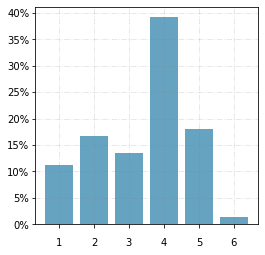

In [5]:
relative_frequencies_sum = relative_frequencies.sum(axis=1)/7
height = relative_frequencies_sum

bars = ('1', '2', '3', '4', '5','6')


# Figure Size
fig, ax= plt.subplots(figsize =(4, 4))


# Horizontal Bar Plot
ax.bar(bars, height,color=(0.0, 0.4, 0.6, 0.6))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.9,
        alpha = 0.2)

    # Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 2)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.savefig('distribution.png')

plt.show()

In [6]:
my_parameter.describe()

,q11,q10,q9,q15,q16,q17,q18
count,173.000000,173.000000,172.000000,173.000000,173.000000,173.000000,173.000000
mean,4.352601,4.132948,2.436047,3.063584,3.387283,3.236994,3.196532
std,0.867673,0.946051,1.320766,1.285656,1.070351,1.203878,1.301426
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,1.000000,2.000000,3.000000,2.000000,2.000000
50%,5.000000,4.000000,2.000000,3.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [7]:
parameter = my_parameter

individualScore = parameter.sum(axis=1)/7

In [8]:
individualScore.describe()

count    173.000000
mean       3.398844
std        0.649423
min        1.857143
25%        3.000000
50%        3.428571
75%        3.857143
max        4.571429
dtype: float64

### Correlation Analysis

## Gender

In [9]:
# GENDER

gender = patients_personalInfo['sex']
gender = pd.concat([gender,individualScore],axis=1)
gender.columns = ['Gender','Score']

male = []
female = []


#create table for every category
for index, row in gender.iterrows(): 
    if row['Gender'] == 2:
        female.append(row['Score'])
    else:
        male.append(row['Score'])

In [10]:
from statistics import mean, pvariance
avg1 = mean(male)
var1 = pvariance(male)
avg2 = mean(female)
var2 = pvariance(female)

print("avg male =", avg1,"var male =",var1,"avg female =", avg2,"var female =",var2 )

avg male = 3.4388807069219443 var male = 0.3889111814350568 avg female = 3.3477443609022557 var female = 0.45345624399344225


In [11]:
tStat, pValue = stats.ttest_ind(female, male, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.3658347117454064 T-Statistic:-0.9069644044686856


## Education

In [12]:
#EDUCATION
education = patients_personalInfo['education']

education= pd.concat([education,individualScore],axis=1)

education.columns = ['Education','Score']

education = education.dropna()



In [13]:
print("Mean")
education.groupby('Education')['Score'].mean()

Mean


Education
1.0    3.676190
2.0    3.285714
3.0    3.487395
4.0    3.301948
5.0    3.738095
6.0    3.207792
7.0    3.214286
8.0    3.244898
Name: Score, dtype: float64

In [14]:
print("Variance")
education.groupby('Education')['Score'].var()

Variance


Education
1.0    0.236359
2.0    0.163265
3.0    0.290966
4.0    0.485255
5.0    0.411164
6.0    0.294902
7.0    0.450296
8.0    0.964043
Name: Score, dtype: float64

In [15]:
defterovathmia = []
texnologiki = []
panepistimiaki = []


#create table for every category of profession
for index, row in education.iterrows(): 
    if row['Education'] == 1 or row['Education'] == 2 or row['Education'] == 3 or row['Education'] == 4:
        defterovathmia.append(row['Score'])
    elif row['Education'] == 5 or row['Education'] == 6:
        texnologiki.append(row['Score'])
    elif row['Education'] == 7 or row['Education'] == 8:
        panepistimiaki.append(row['Score'])


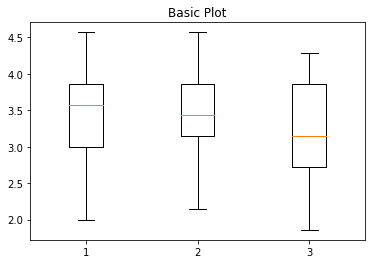

In [16]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([defterovathmia,texnologiki,panepistimiaki])

plt.show()

In [17]:
f_oneway(defterovathmia,texnologiki,panepistimiaki)

F_onewayResult(statistic=1.9647362227252494, pvalue=0.14338200161124257)

## Family

In [18]:
#OIKOGENIAKI KATASTASI 

family = patients_personalInfo['family']

family= pd.concat([family,individualScore],axis=1)

family.columns = ['Family','Score']

family = family.dropna()


In [19]:
print("Mean")
family.groupby('Family')['Score'].mean()

Mean


Family
1.0    3.306122
2.0    3.079832
3.0    3.588850
Name: Score, dtype: float64

In [20]:
print("Variance")
family.groupby('Family')['Score'].var()

Variance


Family
1.0    0.455977
2.0    0.398505
3.0    0.335798
Name: Score, dtype: float64

In [21]:
monos = []
se_gamo = []
se_gamo_me_paidia = []


#create table for every category of profession
for index, row in family.iterrows(): 
    if row['Family'] == 1:
        monos.append(row['Score'])
    elif row['Family'] == 2:
        se_gamo.append(row['Score'])
    elif row['Family'] == 3:
        se_gamo_me_paidia.append(row['Score'])


In [22]:
f_oneway(monos,se_gamo, se_gamo_me_paidia)

F_onewayResult(statistic=8.912164012247132, pvalue=0.0002090748540394303)

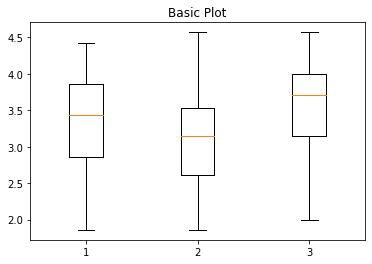

In [23]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([monos,se_gamo, se_gamo_me_paidia])

plt.show()


## Income

In [24]:
#income  

income = patients_personalInfo['income']

income= pd.concat([income,individualScore],axis=1)

income.columns = ['income','Score']

income = income.dropna()


In [25]:
print("Mean")
income.groupby('income')['Score'].mean()



Mean


income
1.0    3.451247
2.0    3.300752
3.0    3.061224
Name: Score, dtype: float64

In [26]:
print("Variance")
income.groupby('income')['Score'].var()

Variance


income
1.0    0.413196
2.0    0.377043
3.0    0.448008
Name: Score, dtype: float64

In [27]:
low = []
mid = []
high = []


#create table for every category of profession
for index, row in income.iterrows(): 
    if row['income'] == 1:
        low.append(row['Score'])
    elif row['income'] == 2:
        mid.append(row['Score'])
    elif row['income'] == 3:
        high.append(row['Score'])

In [28]:
f_oneway(low, mid, high)

F_onewayResult(statistic=1.8549902828848952, pvalue=0.159644655247117)

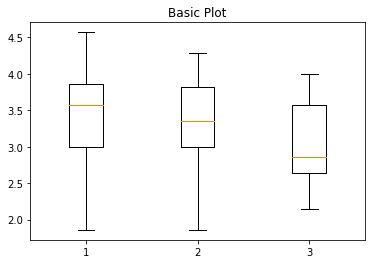

In [29]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([low,mid,high])

plt.show()



## Tomeas Nosileias

In [30]:
#tom nosileias  

nursing_field = patients_personalInfo['nursing field']

nursing_field= pd.concat([nursing_field,individualScore],axis=1)

nursing_field.columns = ['nursing_field','Score']

nursing_field = nursing_field.dropna()


In [31]:
print("Mean")
nursing_field.groupby('nursing_field')['Score'].mean()

Mean


nursing_field
1.0    3.386555
2.0    3.462006
3.0    3.238095
Name: Score, dtype: float64

In [32]:
print("Variance")
nursing_field.groupby('nursing_field')['Score'].var()

Variance


nursing_field
1.0    0.450036
2.0    0.423711
3.0    0.331240
Name: Score, dtype: float64

In [33]:
pathologiko = []
xeirourgiko = []
allo = []


#create table for every category of profession
for index, row in nursing_field.iterrows(): 
    if row['nursing_field'] == 1:
        pathologiko.append(row['Score'])
    elif row['nursing_field'] == 2:
        xeirourgiko.append(row['Score'])
    elif row['nursing_field'] == 3:
        allo.append(row['Score'])

        

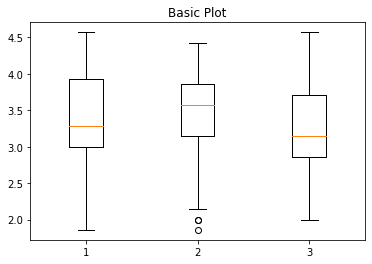

In [34]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([pathologiko,xeirourgiko,allo])

plt.show()

In [35]:
f_oneway(pathologiko,xeirourgiko,allo)

F_onewayResult(statistic=1.288031170880084, pvalue=0.27850672029224804)

## Days in hospital

In [36]:
patients_personalInfo

,sex,age,education,family,occupation,income,nationality,nursing field,nursing days,safety evaluation,comments
0,2,30.0,8.0,3.0,1.0,2.0,2,1.0,5.0,5.0,oxi
1,2,72.0,4.0,3.0,3.0,1.0,1,2.0,7.0,3.0,Περιστέρια στον θάλαμο
2,2,58.0,3.0,3.0,1.0,1.0,1,2.0,6.0,5.0,oxi
3,2,71.0,1.0,3.0,3.0,1.0,1,2.0,7.0,5.0,Peristeria ston thalamo
4,2,72.0,1.0,3.0,3.0,1.0,1,2.0,7.0,5.0,peristeria ston thalamo
5,2,58.0,3.0,1.0,3.0,1.0,1,1.0,7.0,3.0,oxi
6,2,45.0,4.0,3.0,3.0,2.0,2,1.0,NaN,5.0,oxi
7,1,60.0,3.0,2.0,1.0,2.0,1,2.0,4.0,5.0,oxi
8,1,60.0,1.0,1.0,2.0,1.0,1,2.0,5.0,5.0,oxi
9,2,30.0,5.0,1.0,2.0,1.0,1,2.0,2.0,5.0,oxi


In [37]:
days = patients_personalInfo['nursing days']
# create a frame with days and score
days = pd.concat([days,individualScore],axis=1)
days.columns = ['days','Score']
days = days.dropna()

In [38]:
# remove outliers
q = days['days'].quantile(0.99)
days = days[days['days'] < q]

In [39]:
x = days['days']
y = days['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))


(corr,p-val) = (-0.051685975708841495, 0.5216563846866369)


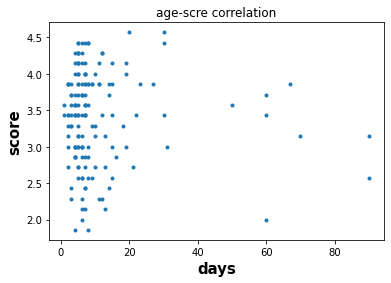

In [40]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("days",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

## Age

In [41]:
age = patients_personalInfo['age']
# create a frame with days and score
age = pd.concat([age,individualScore],axis=1)
age.columns = ['age','Score']
age = age.dropna()

In [42]:
# remove outliers
q = age['age'].quantile(0.99)
age = age[age['age'] < q]

In [43]:
x = age['age']
y = age['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))

(corr,p-val) = (0.19054790483705247, 0.025180480107753245)


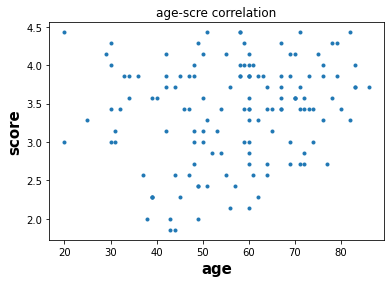

In [44]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()